# Boosting and Stacking

Represent other methods of Meta Classifiers, i.e. brining many classifiers together to output a single prediction.

## Boosting

Boosting, even though it is used as a way of reducing variance, is more meant for **business problems** where we want to continue to better fit (or correct) our model to ensure we can get also **rare events** correct.

- Easily possible to overfit our dataset


- We will generally only have one split for each one of our different trees that we aggregate together


- System of weighting different trees with different weights

**Decision Stump:** is our one-split of our decision tree, this decision stump will separate our universe of outcomes into two different nodes.

<div>
    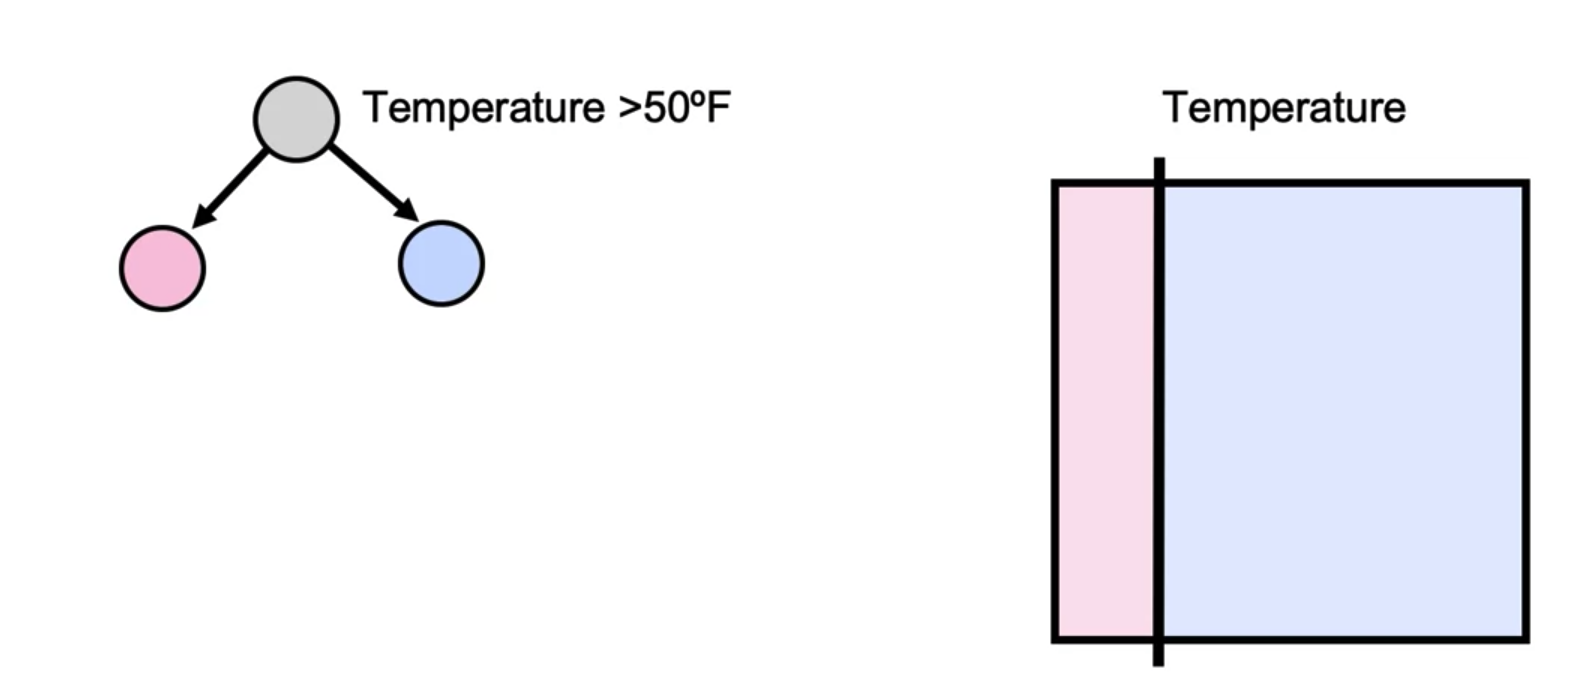
<div />

**Weak Learners:** are the further decision stumps from each separation of each parent node. 

The goal is to build from our **original decision stump**, **further small decision stumps** in order to improve our oriiginal **decision boundary**

With Boosting, we create a new way to decide on and stack togethers many weak learners intelligently to ultimately come up with **a strong classification algorithm**.

<div>
    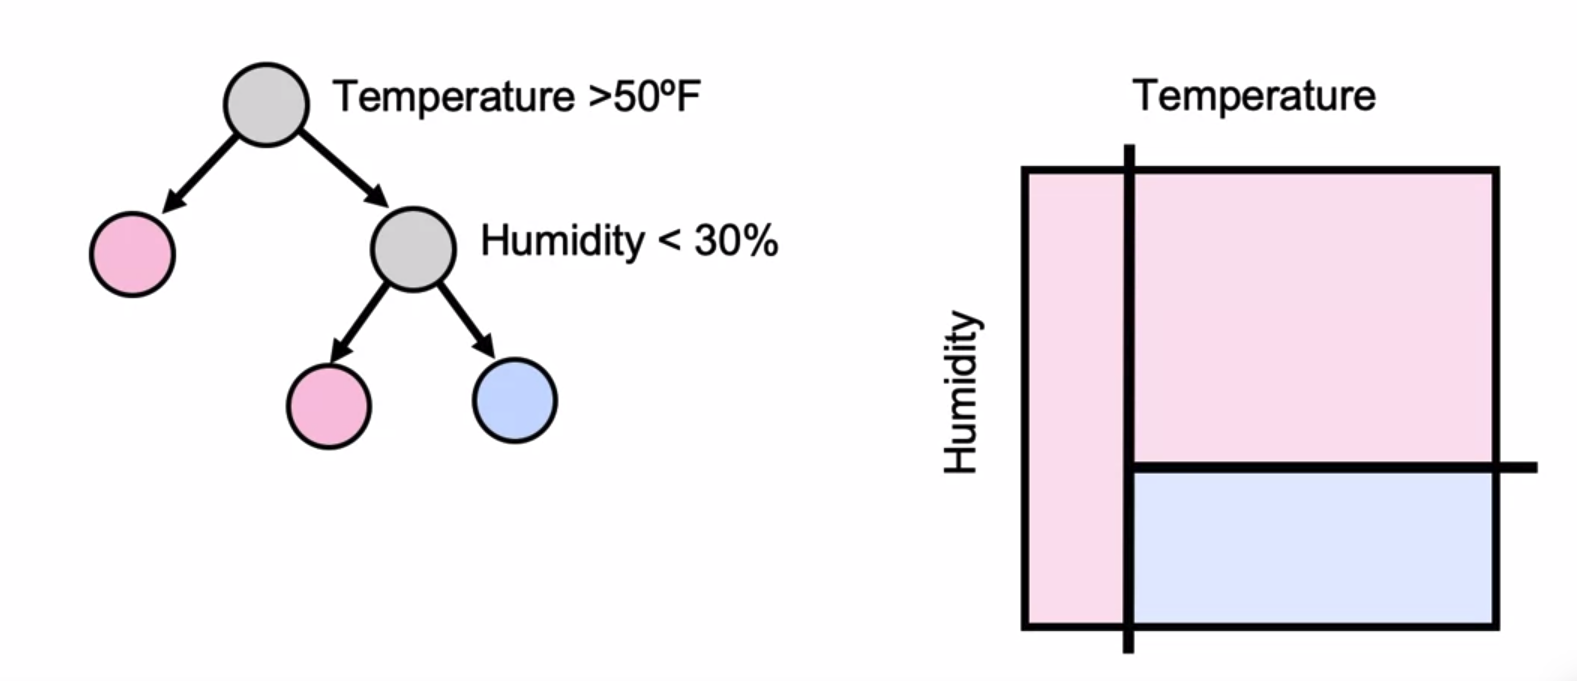
<div />

## How Boosting Works

- Create Initial Decision Stump, with 1 node and 2 leaves, which will split our universe into two


- If we have any misclassifications, we will **weigh them more heavily** in our next weak learner, so we will get a larger error if we get those ones that we got wrong before, wrong again with our new decision boundary.


- The next weak learner should be rewarded more to get these right so we **lower the weights of the records the first model got right** and **increase the weights of the ones that are wrongly classified**


- Can continue to do this based on the prior errors of the previous weak learners

<div>
    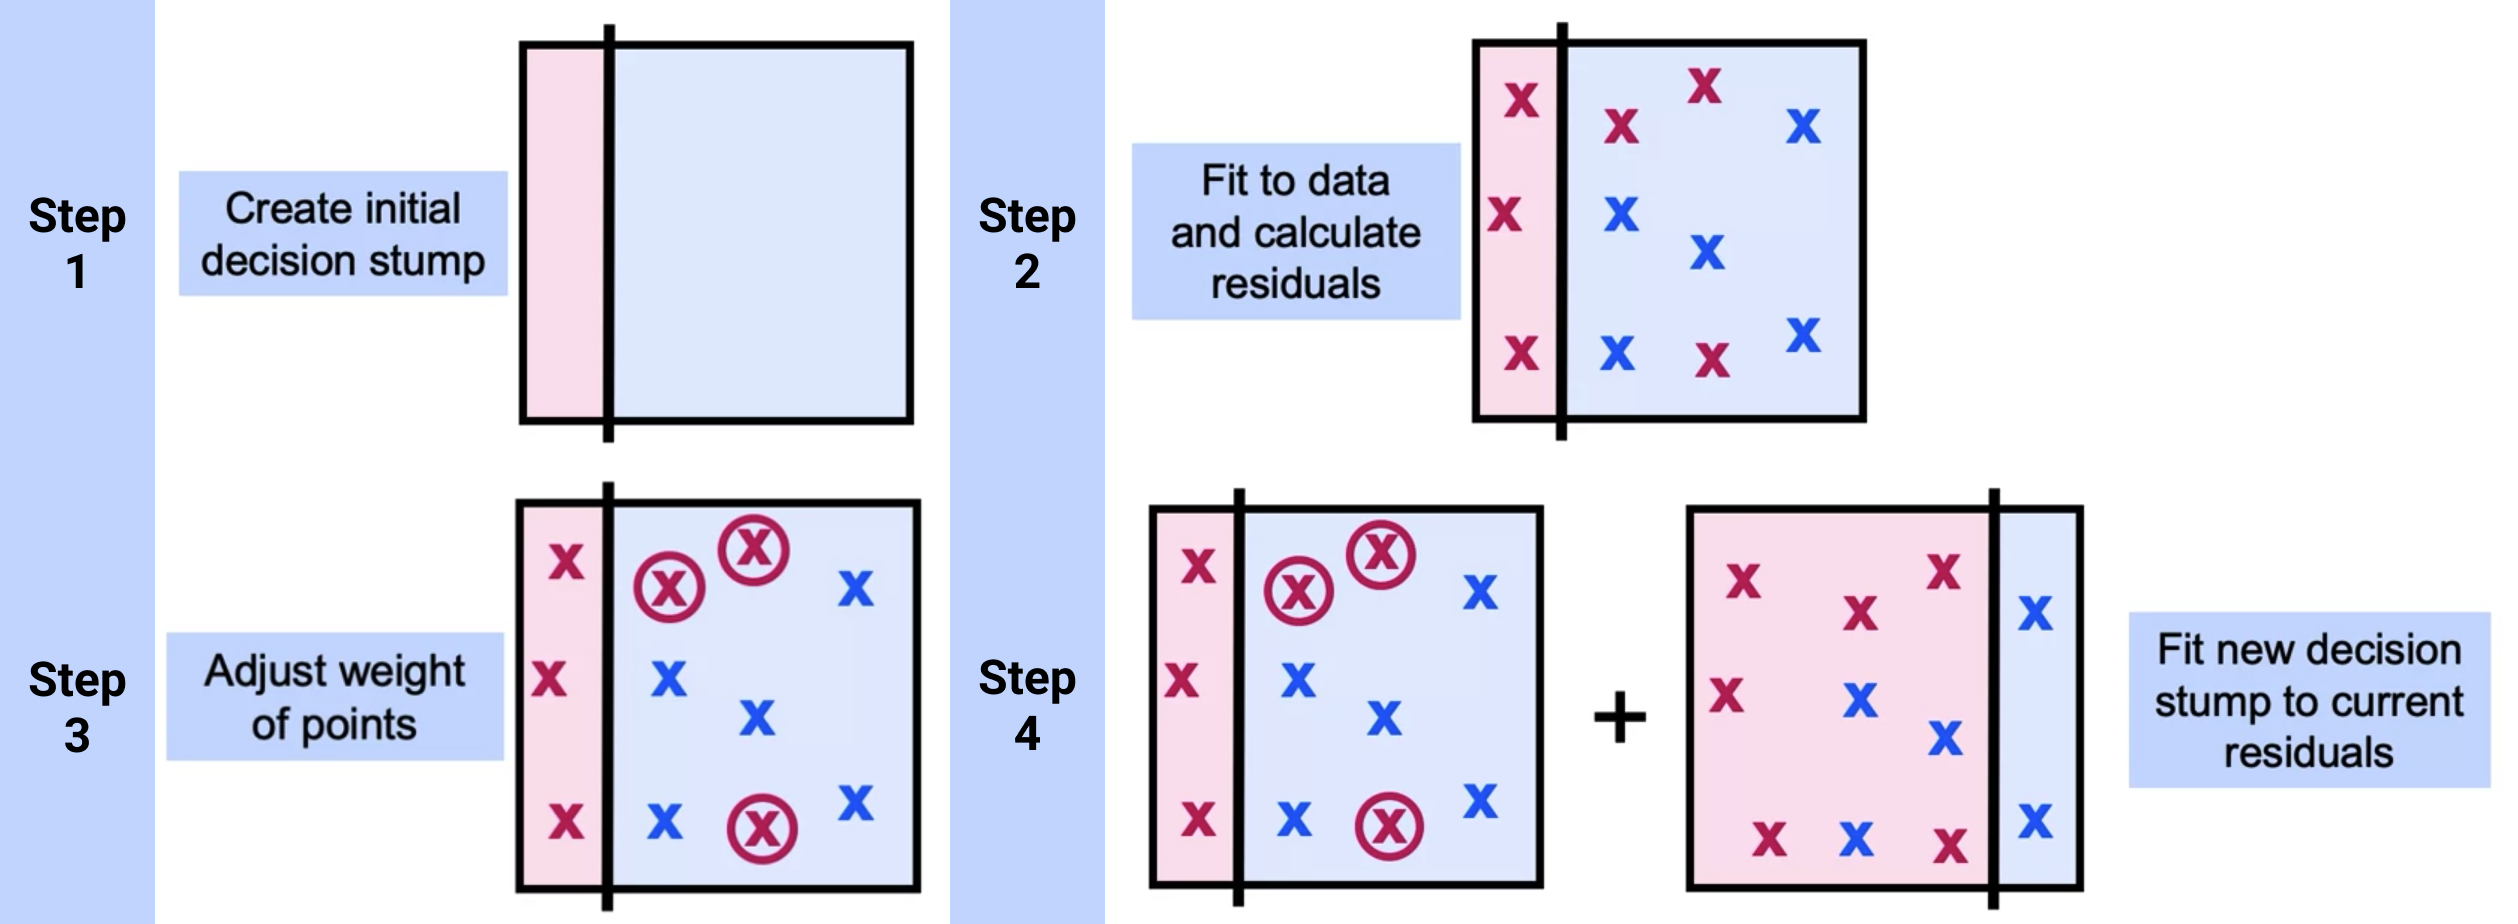
<div />


- Once we are done we can combine them to form a single classifier

<div>
    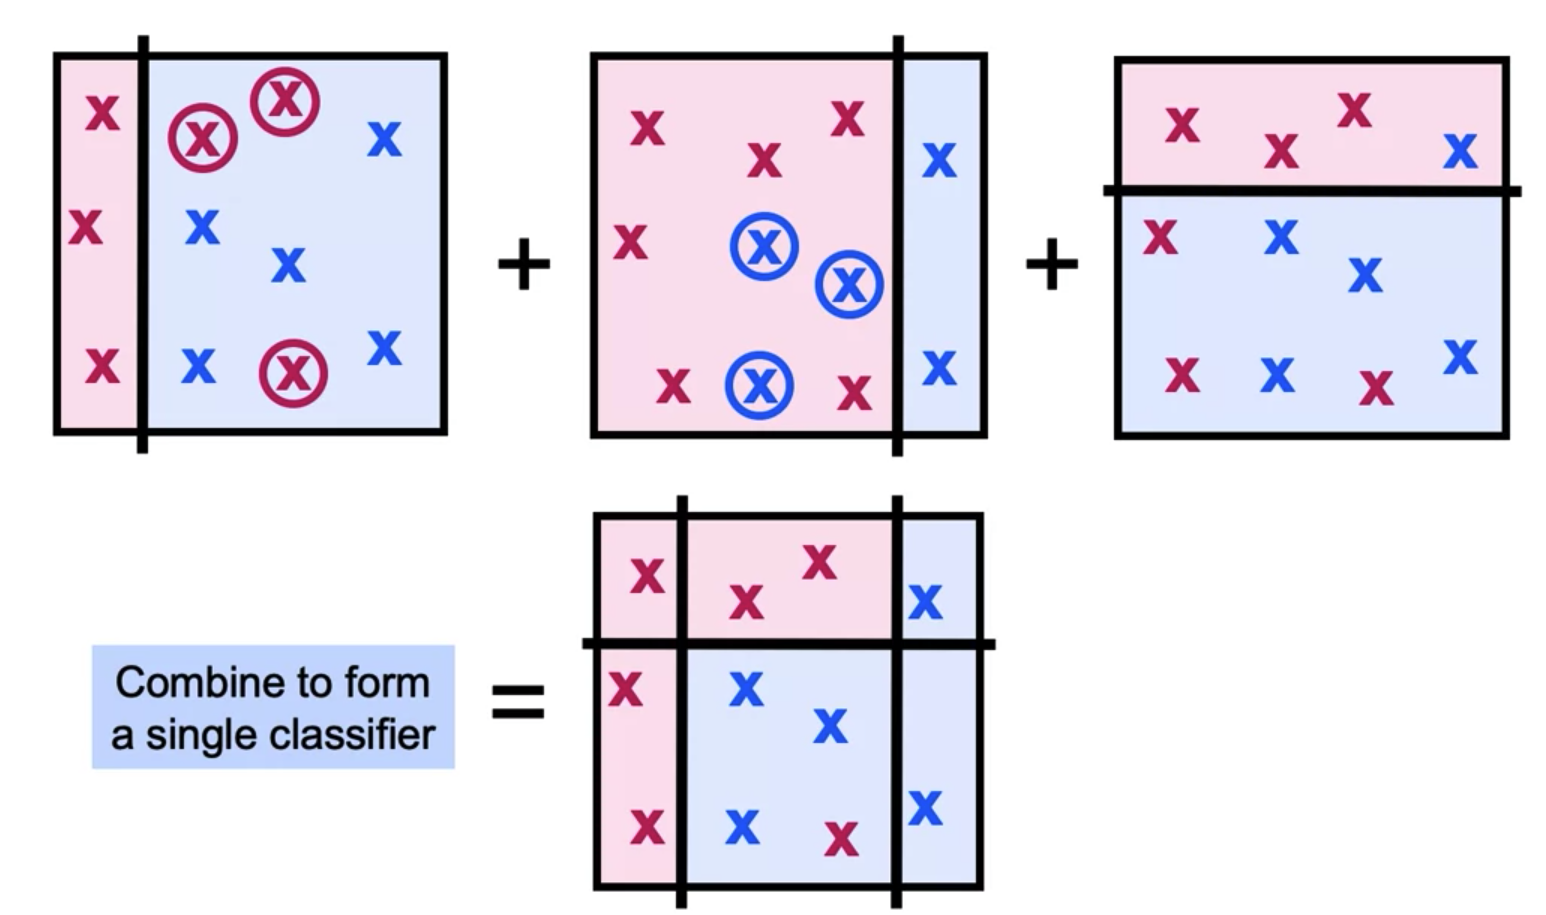
<div />

- The result is the weighted sum of all classifiers

Where, $\lambda$ is our learning rate to which we weugh succesive classifiers

- More trees with a low learning rate (correcting at a slower learning pace) - lower variance and lower bias


- Using a learning rate < 1.0 helps prevents overfitting (regularization)

<div>
    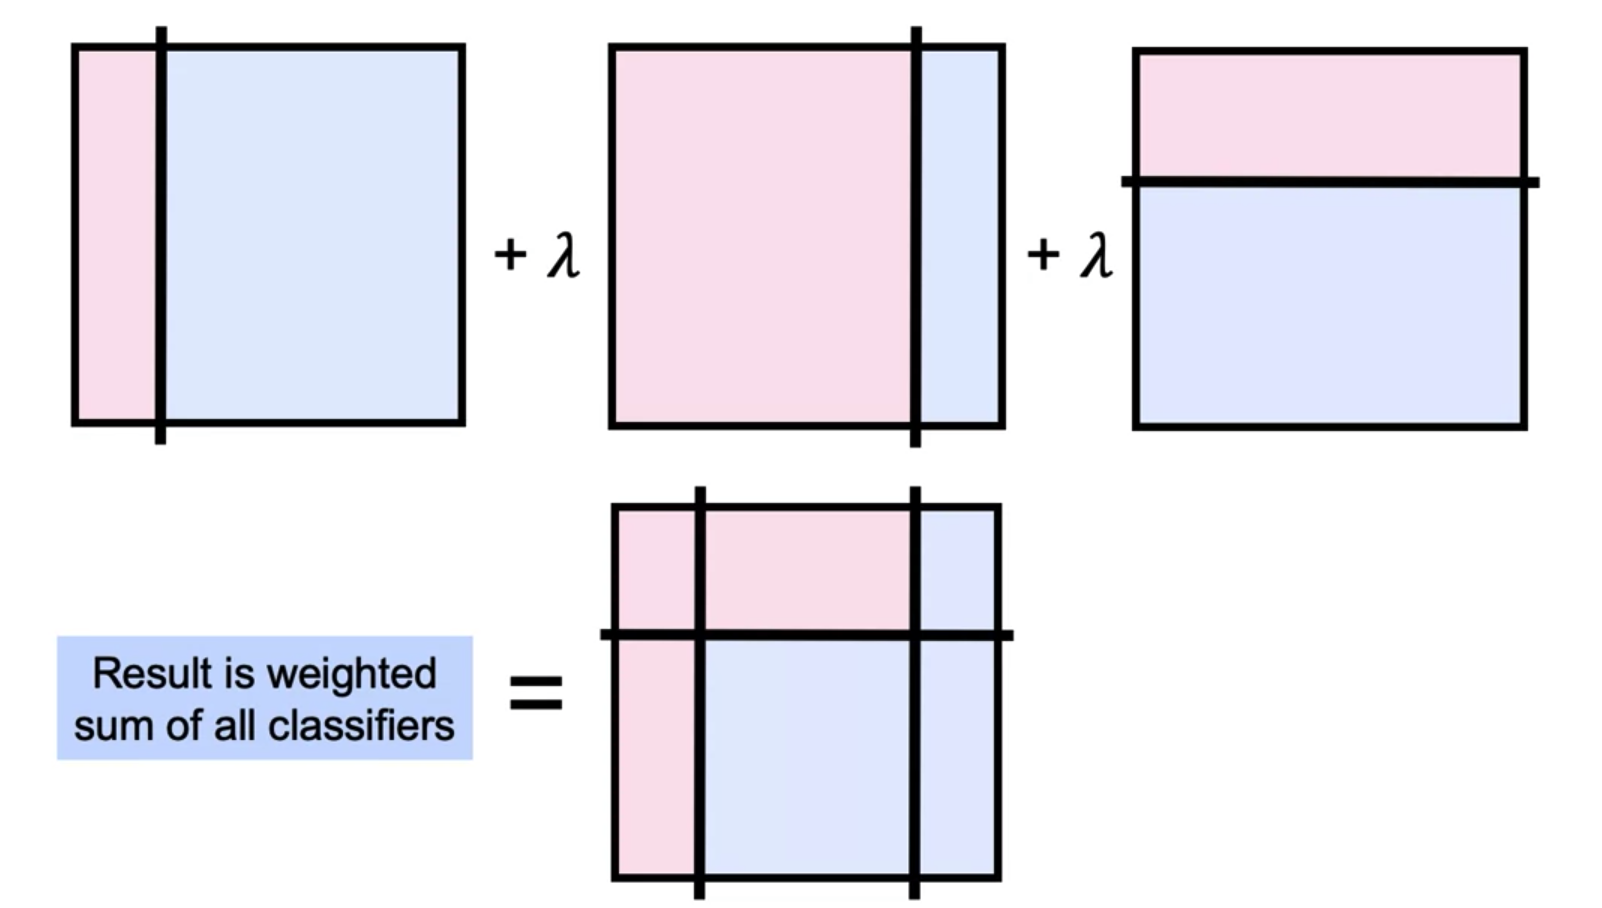
<div />

# Boosting Loss Functions

Boostings utilizes different loss function. At each stage, the **Margin** is determined for each point.

- **Margin**:
    - is positive for correctly identified classified points
    - is negative for misclassifications
    
    
- The value of the Loss Function is calculated from margin (or distance from our decision boundary)


- We can penalize misclassed or far away points heavily or not and the loss function gives us the penalization


<div>
    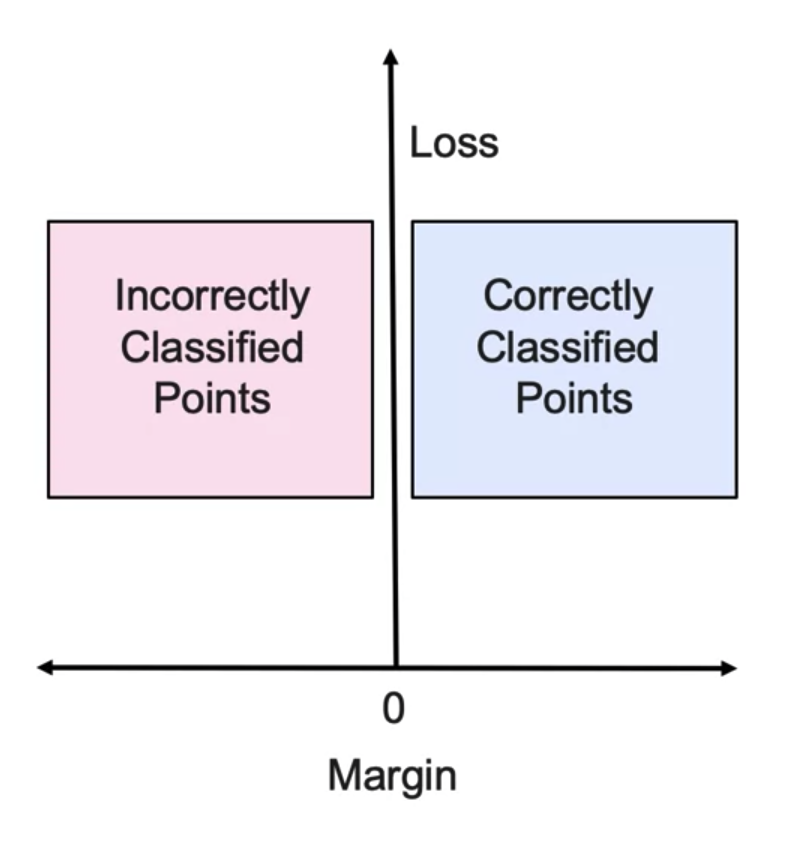
<div />

## a. 0-1 Loss Function

This function returns 1 for incorrectly classified point and **ignores correctly classified ones**

- It is a theoretical loss function due to the fact that it is **non-differentiable** i.e. difficult to optimize, non-smooth and non convex

## b. AdaBoost

Adaptive Boosting uses an exponential loss function:

$$ e^{{-\text{margin}}} $$

- Very negative points can strongly affect the loss so if a distance from our margin is large and incorrect we end up with a large contribution to that overall error for that given point


- Makes AdaBoost more sensitive to outliers than other types of boosting

## c. Gradient Boosting

Is the Generalized boosting method that can use different loss functions.

Common implementations use **binomial log likelihood** loss funcction (deviance):

$$ \log(1 + e^{-\text{margin}}) $$

The reduced log-likelihood function for large margins, for misclassified points, makes this this version of boosting **more robust to outliers than AdaBoost**.

<div>
    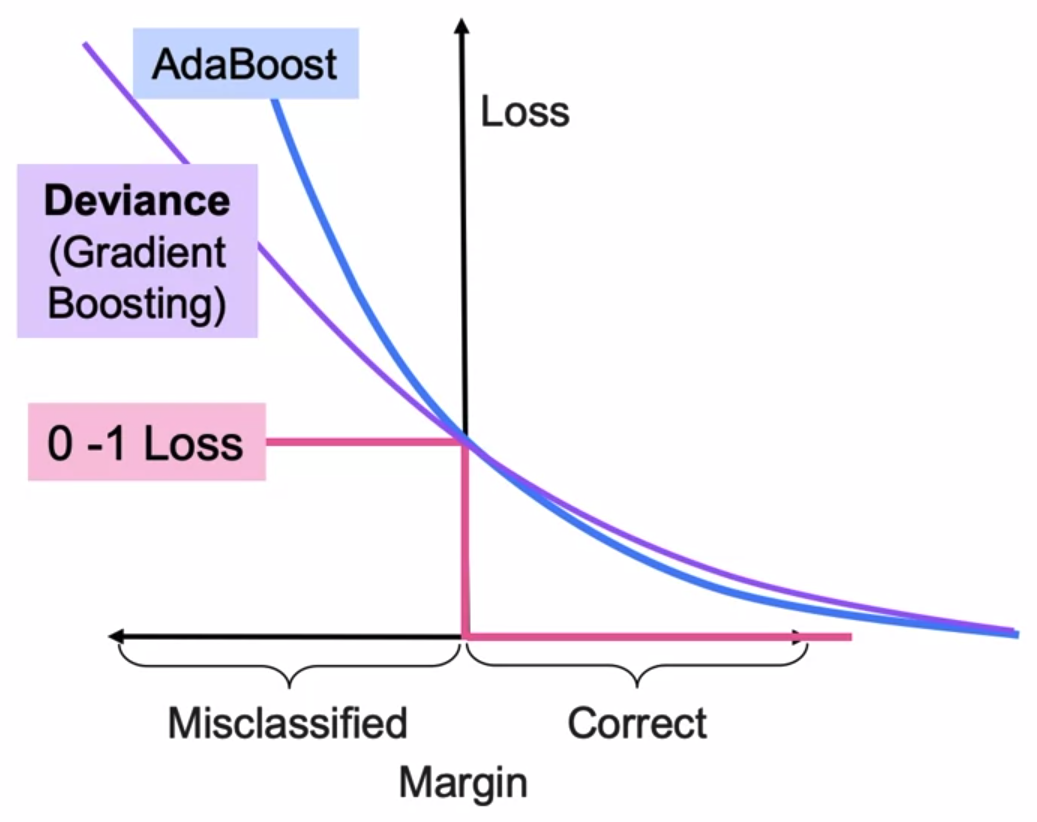
<div />

# Bagging vs. Boosting

<div>
    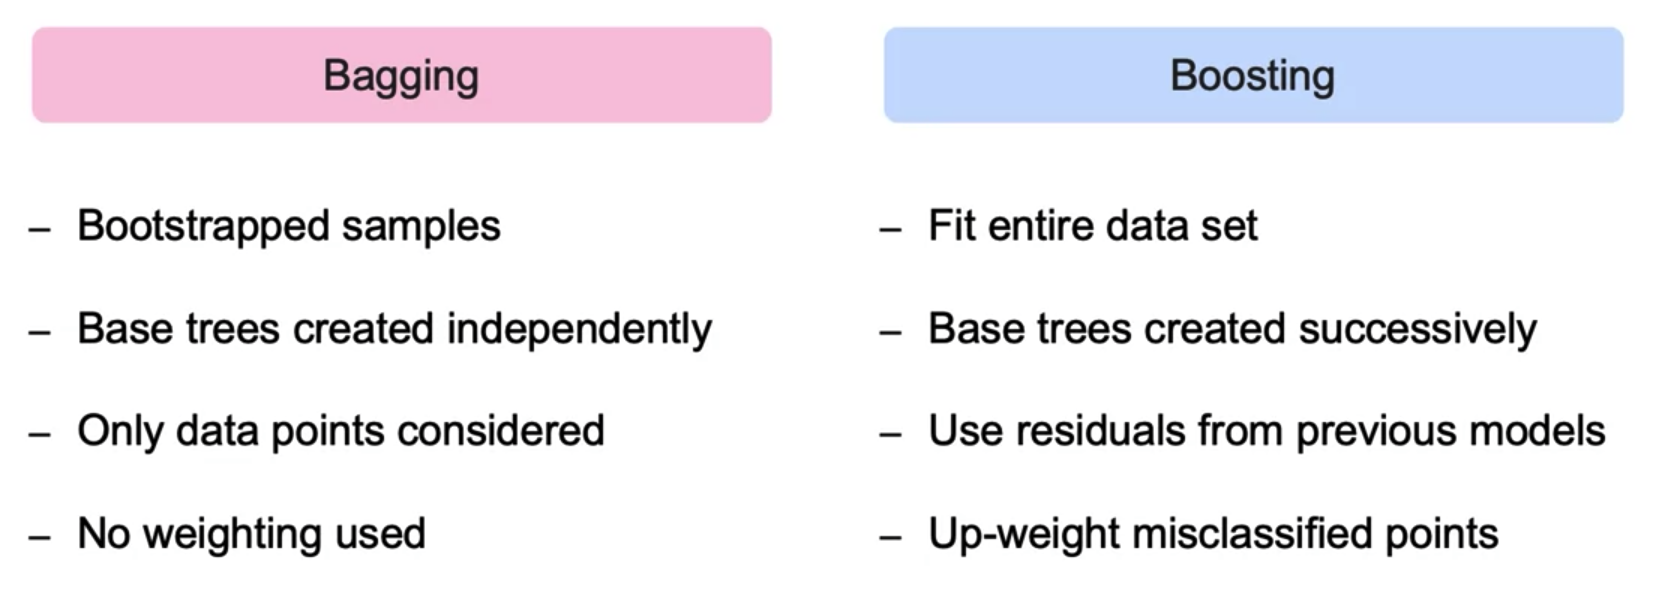
<div />

- Boosting is additive so there is a greater chance of overfitting


- Use cross-validation to set number of trees

<div>
    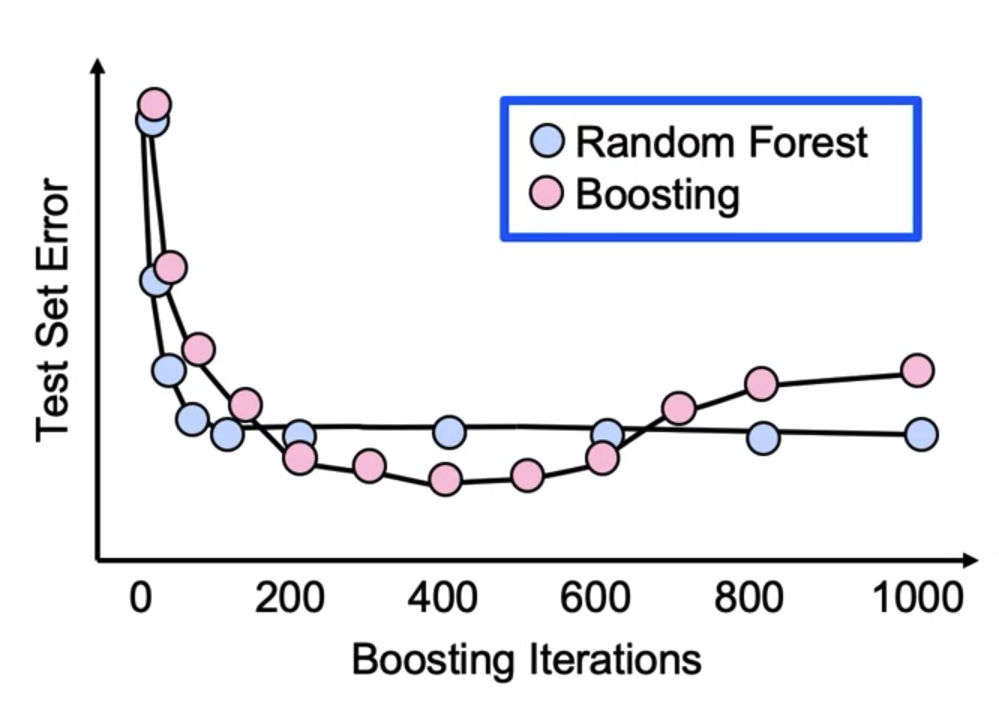
<div />

### Tuning a Gradient Boosted Model

<div>
    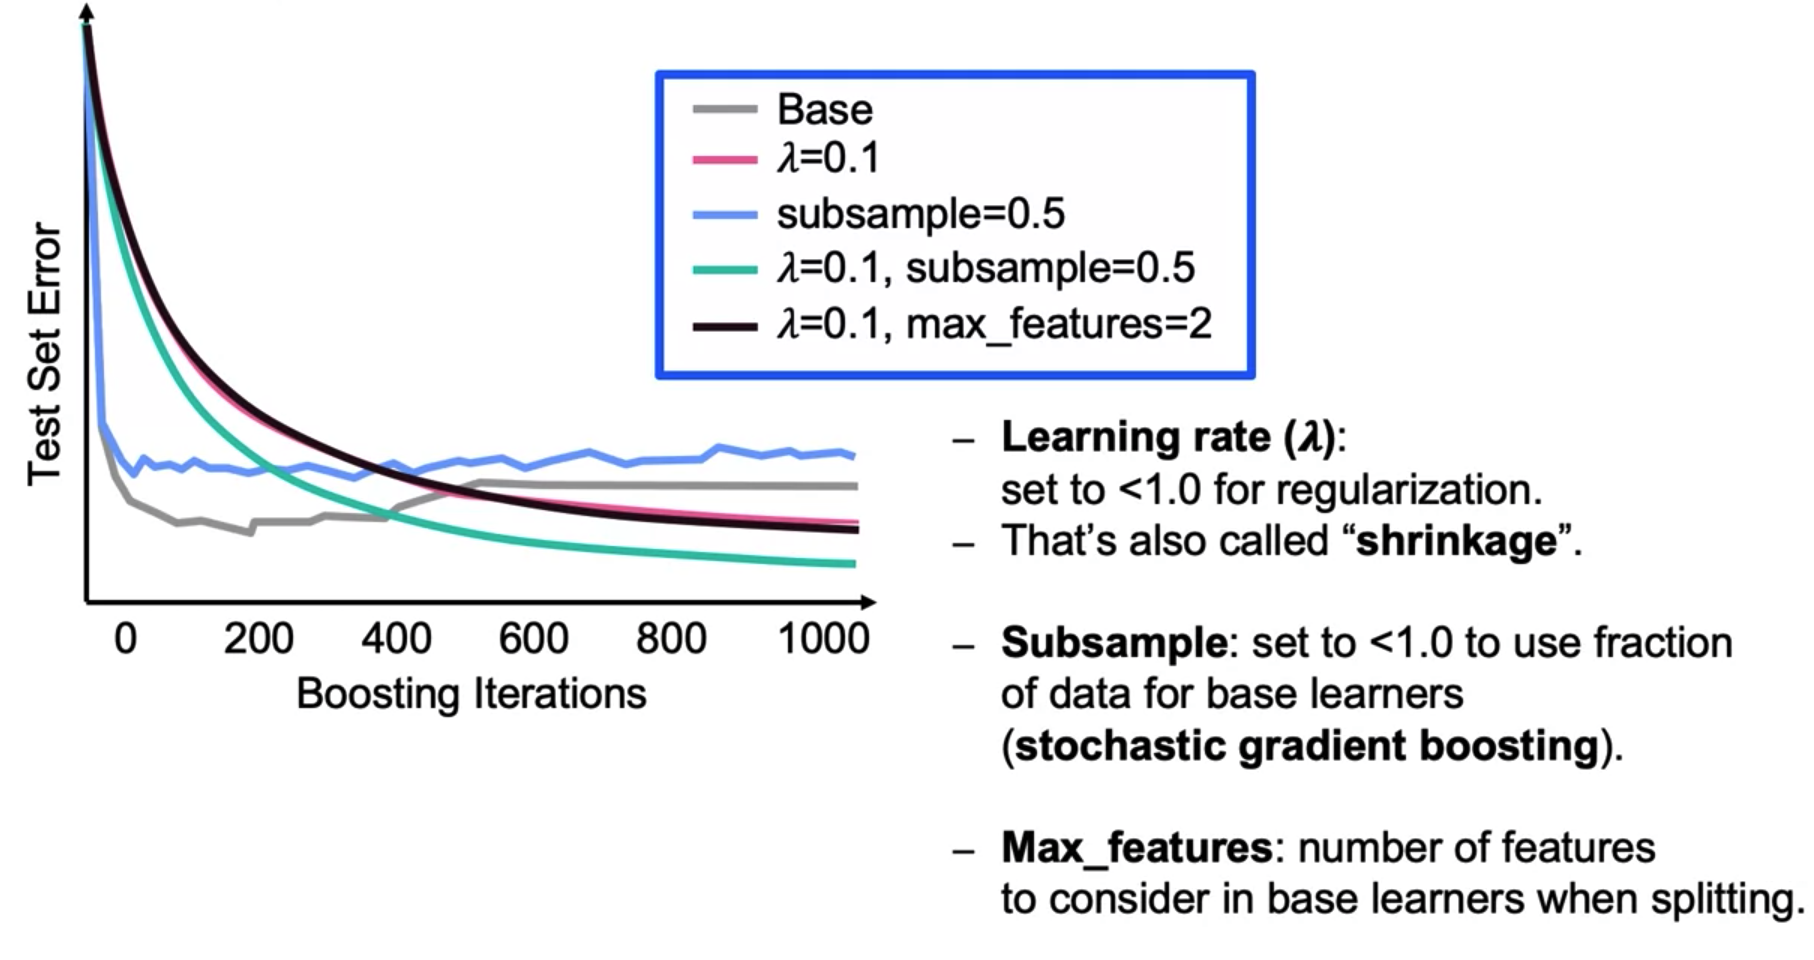
<div />

# Stacking

Models of any kind can be combined to create a stacked model

<div>
    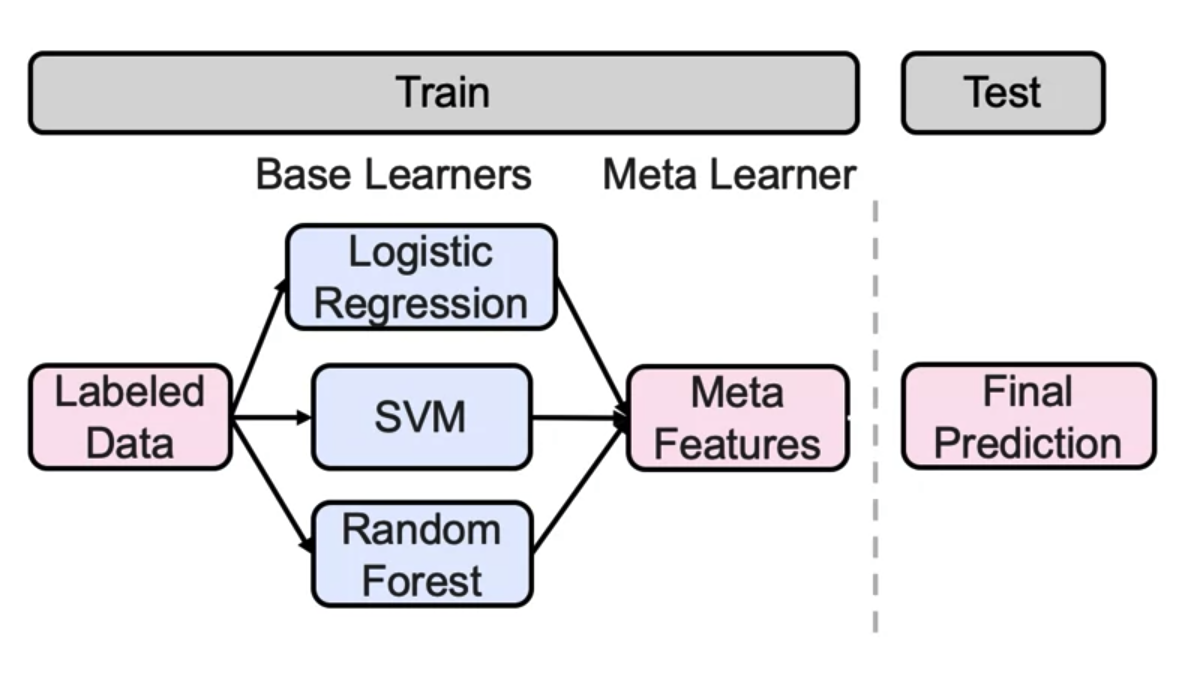
<div />

The idea is to fit several algorithms to our training sets and use their predictions, or theri scores, of each of these individual base learners as a **new training set**.

- These new training sets become our **meta features**, each one of the outputs of each of the based learners.



- Then we pass these through to one final classifier which is our **meta classifier** to come up with a single final prediction (this is an aggregation step similar to what we do with similar ensemble methods in regarding to bringing together all the different votes)



- In a way, it is similar to bagging without needing to boostrap nor to limit to decision trees, instead we train several different algorithms and we can think of this as **testing many different assumptions on our dataset**.



- The **outputs** or those algorithms are again our new features (output of base learners create new features and can recombine with data) to be fed into final aggregation classifier.



- We need train and test set for our base learners as well



- Have to be aware that these models can become complex fairly quickly (overfit)



- The final predictioncan be done by voting (majority or weighted) or with another model

### Python Syntax for Stacking

```python

# Import the class contating the classification method
from sklearn.ensemble import VotingClassifier

# Create an instance of the class
VC = VotingClassifier(estimator_list) # list of fitted models

# Fit the instance on the data and then predict the expected value
VC = VC.fit(X_train, y_train)
y_predict = VC.predict(X_test)

```

Use `VotingRegressor` for Regressions.

The `StackClassifier` (or `StackingRegressor`) works similarly:

```python 
SC = StackingClassifier(estimator_list, final_estimator=LogisticRegression())
```

## In Practice

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

For each record in the dataset it is provided: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.


- Triaxial angular velocity from the gyroscope. 


- A 561-feature vector with time and frequency domain variables. 


- Its activity label. 

More information about the features is available on the website above.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns

## Question 1

* Import the data from the file `Human_Activity_Recognition_Using_Smartphones_Data.csv` and examine the shape and data types. For the data types, there will be too many to list each column separately. Rather, aggregate the types by count.
* Determine if the float columns need to be scaled.

In [2]:
filepath = 'Human_Activity_Recognition_Using_Smartphones_Data.csv'
data = pd.read_csv(filepath, sep=',')

The data has quite a few predictor columns.

In [3]:
data.shape

(10299, 562)

And they're all float values. The only non-float is the categories column, which is what's being predicted.

In [4]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

The minimum and maximum value for the float columns is -1.0 and 1.0, respectively. However, scaling is never required for tree-based methods.

In [6]:
# Mask to select float columns
float_columns = (data.dtypes == float)

# Verify that the maximum of all float columns is 1.0
print( (data.loc[:,float_columns].max()==1.0).all() )

# Verify that the minimum of all float columns is -1.0
print( (data.loc[:,float_columns].min()==-1.0).all() )

True
True


## Encode and Train - Test Split

* Integer encode the activities.


* Split the data into train and test data sets. Decide if the data will be stratified or not during the train/test split (if there is sometype of imbalance).

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Activity'] = le.fit_transform(data['Activity'])

le.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [8]:
data.Activity.unique()

array([2, 1, 0, 3, 4, 5])

**NOTE**: We are about to create training and test sets from `data`. On those datasets, we are going to run grid searches over many choices of parameters. This can take some time. In order to shorten the grid search time, feel free to downsample `data` and create `X_train, X_test, y_train, y_test` from the downsampled dataset.

Now split the data into train and test data sets. A stratified split was not used here. If there are issues with any of the error metrics on the test set, it can be a good idea to start model fitting over using a stratified split. Boosting is a pretty powerful model, though, so it may not be necessary in this case.

In [9]:
from sklearn.model_selection import train_test_split

# Alternatively, we could stratify the categories in the split, as was done previously
feature_columns = [x for x in data.columns if x != 'Activity']

X_train, X_test, y_train, y_test = train_test_split(data[feature_columns], data['Activity'],
                 test_size=0.3, random_state=42)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7209, 561), (7209,), (3090, 561), (3090,))

## Gradient Boosted Trees

* Fit gradient boosted tree models with all parameters set to their defaults the following tree numbers (`n_estimators = [15, 25, 50, 100, 200, 400]`) and evaluate the accuracy on the test data for each of these models. 


* Plot the accuracy as a function of estimator number.

*Note:* there is no out-of-bag error for boosted models. And the `warm_flag=True` setting has a bug in the gradient boosted model, so don't use it. Simply create the model inside the `for` loop and set the number of estimators at this time. This will make the fitting take a little longer. Additionally, boosting models tend to take longer to fit than bagged ones because the decision stumps must be fit successively.

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

error_list = list()

# Iterate through various possibilities for number of trees
tree_list = [15, 25, 50, 100, 200, 400]
for n_trees in tree_list:
    
    # Initialize the gradient boost classifier
    GBC = GradientBoostingClassifier(max_features=5, n_estimators=n_trees, random_state=42)

    # Fit the model
    print(f'Fitting model with {n_trees} trees')
    GBC.fit(X_train.values, y_train.values)
    y_pred = GBC.predict(X_test)

    # Get the error
    error = 1.0 - accuracy_score(y_test, y_pred)
    
    # Store it
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))

error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')

error_df

Fitting model with 15 trees
Fitting model with 25 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 200 trees
Fitting model with 400 trees


error
n_trees          
15.0     0.104854
25.0     0.072492
50.0     0.040129
100.0    0.024595
200.0    0.015210
400.0    0.014239

We see diminishing error rates

Now plot the result.

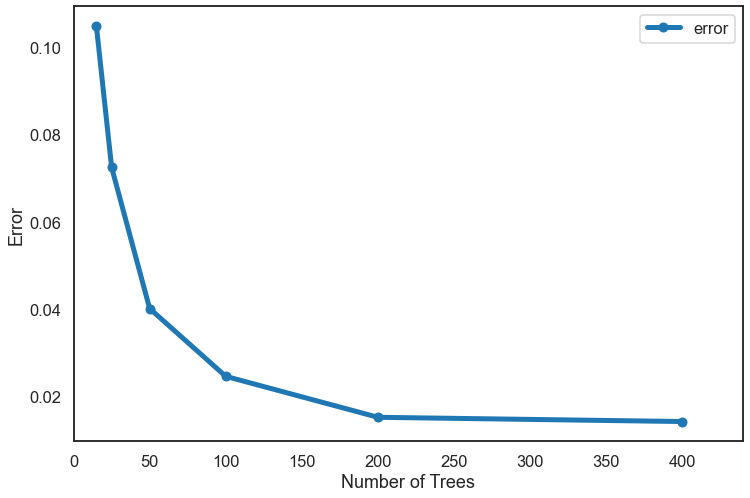

In [14]:
sns.set_context('talk')
sns.set_style('white')

# Create the plot
ax = error_df.plot(marker='o', figsize=(12, 8), linewidth=5)

# Set parameters
ax.set(xlabel='Number of Trees', ylabel='Error')
ax.set_xlim(0, max(error_df.index)*1.1);

## Cross-Validation for Gradient Boosted Classifiers

* Using a grid search with cross-validation, fit a new gradient boosted classifier with the same list of estimators. Also try varying the learning rates (0.1, 0.01, 0.001, etc.), the subsampling value (1.0 or 0.5), and the number of maximum features (1, 2, etc.).


* Examine the parameters of the best fit model.


* Calculate relevant error metrics on this model and examine the confusion matrix.

In [16]:
from sklearn.model_selection import GridSearchCV

# The parameters to be fit
param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.1, 0.01, 0.001],
              'subsample': [1.0, 0.5],
              'max_features': [2, 3, 4]}

# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(n_estimators = 400, random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(X_train, y_train)

Save model object

In [17]:
import pickle
pickle.dump(GV_GBC, open('gv_gbc.p', "wb"))

# to open we can: pickle.load(filename, "rb")

In [18]:
# The best model
GV_GBC.best_estimator_

GradientBoostingClassifier(max_features=4, n_estimators=400, random_state=42,
                           subsample=0.5)

The error metrics. Classification report is particularly convenient for multi-class cases.

In [19]:
from sklearn.metrics import classification_report

y_pred = GV_GBC.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       597
           1       0.96      0.98      0.97       556
           2       0.98      0.97      0.97       551
           3       1.00      1.00      1.00       540
           4       0.99      1.00      0.99       419
           5       0.99      0.99      0.99       427

    accuracy                           0.99      3090
   macro avg       0.99      0.99      0.99      3090
weighted avg       0.99      0.99      0.99      3090



The confusion matrix. Note that the gradient boosted model has a little trouble distinguishing between activity class 1 and 2.

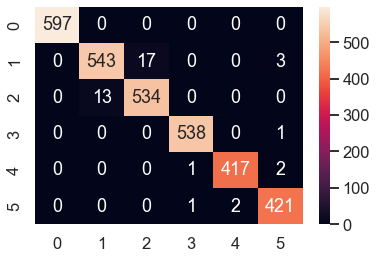

In [21]:
from sklearn.metrics import confusion_matrix

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')

## AdaBoost Model

* Create an AdaBoost model and fit it using grid search. Try a range of estimators between 100 and 200.


* Compare the errors from AdaBoost to those from the GradientBoostedClassifier.

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.001]}

GV_ABC = GridSearchCV(ABC,
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

GV_ABC = GV_ABC.fit(X_train, y_train)

In [23]:
import pickle
pickle.dump(GV_ABC, open('gv_abc.p', "wb"))

# to open we can: pickle.load(filename, "rb")

The best model.

In [24]:
# The best model
GV_ABC.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=100)

The error metrics. Note that the issues with class 1 and 2 appear to have become more problematic. Also note other issues for classes 3 - 5. AdaBoost is very sensitive to outliers, so that could be the problem here.

In [25]:
y_pred = GV_ABC.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       600
           1       0.00      1.00      0.00         1
           2       1.00      0.49      0.66      1106
           3       0.92      0.84      0.88       589
           4       0.73      0.95      0.82       320
           5       0.89      0.80      0.84       474

    accuracy                           0.75      3090
   macro avg       0.76      0.85      0.70      3090
weighted avg       0.94      0.75      0.81      3090



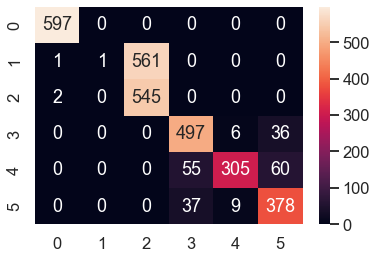

In [26]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')

## Voting Classifier Stacked Model

* Fit a logistic regression model with regularization. 


* Using `VotingClassifier`, fit the logistic regression model along with either the GratientBoostedClassifier or the AdaBoost model (or both)


* Determine the error as before and compare the results to the appropriate gradient boosted model(s).


* Plot the confusion matrix for the best model created in this set of exercises.

In [27]:
from sklearn.linear_model import LogisticRegression

# L2 regularized logistic regression
LR_L2 = LogisticRegression(penalty='l2', max_iter=500, solver='saga').fit(X_train, y_train)

Check the errors and confusion matrix for the logistic regression model.

In [28]:
y_pred = LR_L2.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       598
           1       0.95      0.96      0.95       558
           2       0.95      0.95      0.95       547
           3       1.00      0.99      0.99       544
           4       0.98      1.00      0.99       413
           5       1.00      0.98      0.99       430

    accuracy                           0.98      3090
   macro avg       0.98      0.98      0.98      3090
weighted avg       0.98      0.98      0.98      3090



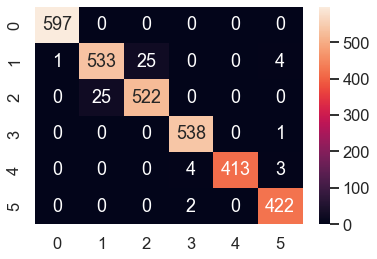

In [29]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')

And now the stacked model.

In [30]:
from sklearn.ensemble import VotingClassifier

# The combined model--logistic regression and gradient boosted trees
estimators = [('LR_L2', LR_L2), ('GBC', GV_GBC)]

# Though it wasn't done here, it is often desirable to train 
# this model using an additional hold-out data set and/or with cross validation
VC = VotingClassifier(estimators, voting='soft') # soft outputs the probabilities
VC = VC.fit(X_train, y_train)

Performance for the voting classifier should improve relative to either logistic regression or gradient boosted trees alone. However, the fact that logistic regression does almost as well as gradient boosted trees is an important reminder to try the simplest model first. In some cases, its performance will be good enough.

In [33]:
y_pred = VC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       597
           1       0.97      0.96      0.97       563
           2       0.97      0.97      0.97       547
           3       1.00      1.00      1.00       539
           4       1.00      1.00      1.00       420
           5       0.99      1.00      0.99       424

    accuracy                           0.99      3090
   macro avg       0.99      0.99      0.99      3090
weighted avg       0.99      0.99      0.99      3090



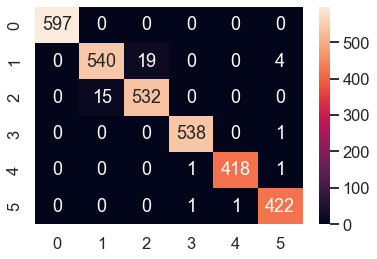

In [34]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')